In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 - 3s - 195ms/step - loss: 0.3633
Epoch 2/200
14/14 - 0s - 10ms/step - loss: 0.0991
Epoch 3/200
14/14 - 0s - 5ms/step - loss: 0.0128
Epoch 4/200
14/14 - 0s - 10ms/step - loss: 0.0041
Epoch 5/200
14/14 - 0s - 5ms/step - loss: 0.0025
Epoch 6/200
14/14 - 0s - 5ms/step - loss: 0.0018
Epoch 7/200
14/14 - 0s - 5ms/step - loss: 0.0015
Epoch 8/200
14/14 - 0s - 10ms/step - loss: 0.0014
Epoch 9/200
14/14 - 0s - 5ms/step - loss: 0.0016
Epoch 10/200
14/14 - 0s - 5ms/step - loss: 0.0016
Epoch 11/200
14/14 - 0s - 6ms/step - loss: 0.0011
Epoch 12/200
14/14 - 0s - 6ms/step - loss: 9.3059e-04
Epoch 13/200
14/14 - 0s - 5ms/step - loss: 7.9235e-04
Epoch 14/200
14/14 - 0s - 10ms/step - loss: 8.4542e-04
Epoch 15/200
14/14 - 0s - 5ms/step - loss: 9.8424e-04
Epoch 16/200
14/14 - 0s - 5ms/step - loss: 0.0011
Epoch 17/200
14/14 - 0s - 10ms/step - loss: 0.0011
Epoch 18/200
14/14 - 0s - 5ms/step - loss: 0.0010
Epoch 19/200
14/14 - 0s - 5ms/step - loss: 9.8546e-04
Epoch 20/200
14/14 - 0s - 5ms/step - loss: 8

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 390ms/step - loss: 0.2741
Epoch 2/200
7/7 - 0s - 9ms/step - loss: 0.2440
Epoch 3/200
7/7 - 0s - 7ms/step - loss: 0.2052
Epoch 4/200
7/7 - 0s - 6ms/step - loss: 0.1715
Epoch 5/200
7/7 - 0s - 7ms/step - loss: 0.1423
Epoch 6/200
7/7 - 0s - 8ms/step - loss: 0.1106
Epoch 7/200
7/7 - 0s - 8ms/step - loss: 0.0783
Epoch 8/200
7/7 - 0s - 8ms/step - loss: 0.0687
Epoch 9/200
7/7 - 0s - 6ms/step - loss: 0.0641
Epoch 10/200
7/7 - 0s - 6ms/step - loss: 0.0614
Epoch 11/200
7/7 - 0s - 10ms/step - loss: 0.0571
Epoch 12/200
7/7 - 0s - 19ms/step - loss: 0.0528
Epoch 13/200
7/7 - 0s - 8ms/step - loss: 0.0475
Epoch 14/200
7/7 - 0s - 7ms/step - loss: 0.0443
Epoch 15/200
7/7 - 0s - 8ms/step - loss: 0.0395
Epoch 16/200
7/7 - 0s - 8ms/step - loss: 0.0341
Epoch 17/200
7/7 - 0s - 8ms/step - loss: 0.0308
Epoch 18/200
7/7 - 0s - 7ms/step - loss: 0.0291
Epoch 19/200
7/7 - 0s - 6ms/step - loss: 0.0240
Epoch 20/200
7/7 - 0s - 7ms/step - loss: 0.0225
Epoch 21/200
7/7 - 0s - 8ms/step - loss: 0.0184
Epoch 22/

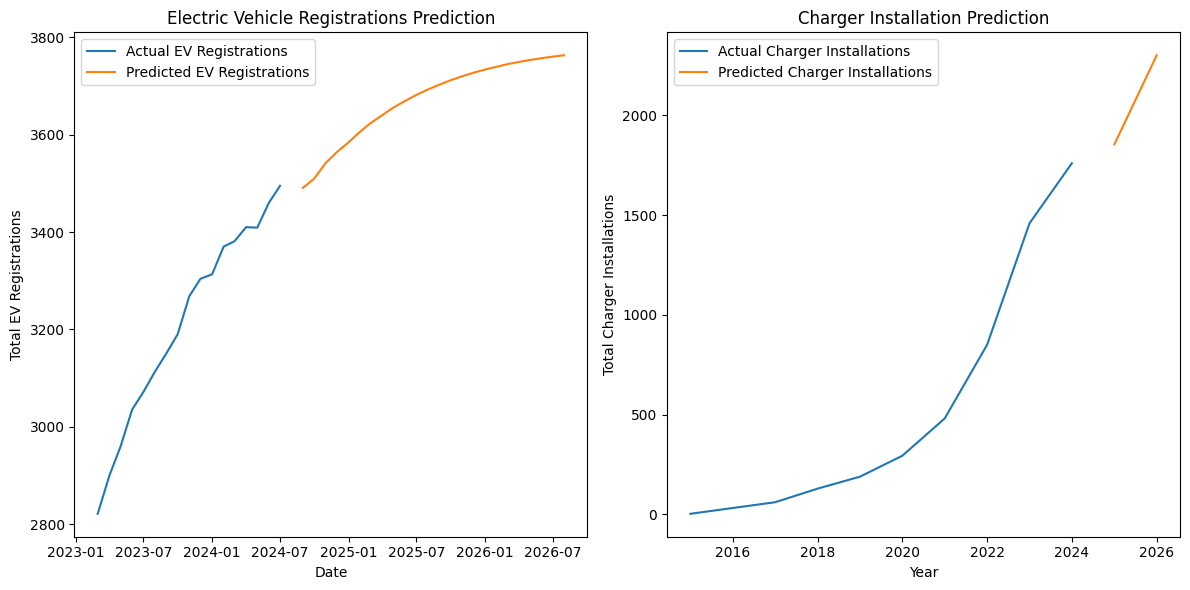

Predicted EV to Charger Ratio in 2026: 1.64 EVs per Charger
Pearson correlation coefficient: 1.00


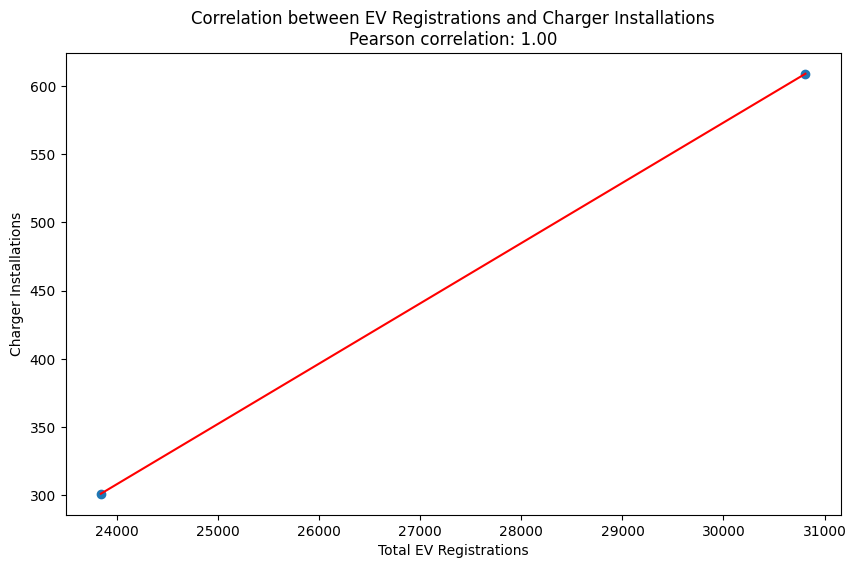

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 파일 경로 설정
ev_file_path = '/content/drive/MyDrive/강릉시 전기 자동차등록현황 추이 23년 3월 ~ 24년 6월.xlsx'  # 전기차 데이터 파일 경로
charger_file_path = '/content/drive/MyDrive/installation_year_counts.xlsx'  # 충전기 데이터 파일 경로

# 엑셀 파일을 데이터프레임으로 불러오기
ev_data = pd.read_excel(ev_file_path)
charger_data = pd.read_excel(charger_file_path)

# 데이터 전처리
ev_data_cleaned = ev_data.iloc[4:].copy()  # 불필요한 첫 4행 제거

# 열 이름 설정
ev_data_cleaned.columns = ['Index', 'Region', 'Date', 'Fuel_Type', 'Passenger', 'Passenger_Sum', 'Cargo', 'Special', 'Total']

# 불필요한 열 제거
ev_data_cleaned = ev_data_cleaned.drop(columns=['Index', 'Region', 'Fuel_Type', 'Passenger', 'Passenger_Sum', 'Cargo', 'Special'])

# 결측값 제거
ev_data_cleaned = ev_data_cleaned.dropna()

# 날짜 형식을 '24.07'에서 '2024-07-01'로 변환
ev_data_cleaned['Date'] = pd.to_datetime(ev_data_cleaned['Date'].astype(str), format='%y.%m')

# 데이터 정렬
ev_data_cleaned = ev_data_cleaned.sort_values('Date')

# 전기 자동차 등록 대수 예측
def predict_electric_vehicles(data, n_future=24):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Total'].values.reshape(-1, 1))

    sequence_length = 3
    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=200, batch_size=1, verbose=2)

    predictions = []
    last_sequence = X[-1]
    for _ in range(n_future):
        prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
        predictions.append(prediction[0, 0])
        last_sequence = np.append(last_sequence[1:], prediction[0, 0]).reshape(sequence_length, 1)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    future_dates = pd.date_range(data['Date'].max(), periods=n_future + 1, freq='M')[1:]

    return future_dates, predictions

# 충전기 설치 개수 예측
def predict_chargers(data, n_future=2):
    data['Total_Count'] = data['Count'].cumsum()
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Total_Count'].values.reshape(-1, 1))

    sequence_length = 2
    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=200, batch_size=1, verbose=2)

    predictions = []
    last_sequence = X[-1]
    for _ in range(n_future):
        prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
        predictions.append(prediction[0, 0])
        last_sequence = np.append(last_sequence[1:], prediction[0, 0]).reshape(sequence_length, 1)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    future_years = pd.date_range(start=f'{data["Year"].max()+1}', periods=n_future, freq='Y').year

    return future_years, predictions

# 전기 자동차 예측
ev_future_dates, ev_predictions = predict_electric_vehicles(ev_data_cleaned, n_future=24)

# 충전기 예측
charger_future_years, charger_predictions = predict_chargers(charger_data, n_future=2)

# 결과 비교 및 인사이트 도출
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(ev_data_cleaned['Date'], ev_data_cleaned['Total'], label='Actual EV Registrations')
plt.plot(ev_future_dates, ev_predictions, label='Predicted EV Registrations')
plt.xlabel('Date')
plt.ylabel('Total EV Registrations')
plt.title('Electric Vehicle Registrations Prediction')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(charger_data['Year'], charger_data['Count'].cumsum(), label='Actual Charger Installations')
plt.plot(charger_future_years, charger_predictions, label='Predicted Charger Installations')
plt.xlabel('Year')
plt.ylabel('Total Charger Installations')
plt.title('Charger Installation Prediction')
plt.legend()

plt.tight_layout()
plt.show()

# 인사이트 도출
ev_to_charger_ratio = ev_predictions[-1] / charger_predictions[-1]
print(f"Predicted EV to Charger Ratio in {charger_future_years[-1]}: {ev_to_charger_ratio[0]:.2f} EVs per Charger")
# 상관관계 분석 및 시각화
# 연도별 전기차 총 등록 대수 집계
ev_data_cleaned['Year'] = ev_data_cleaned['Date'].dt.year
ev_yearly = ev_data_cleaned.groupby('Year')['Total'].sum().reset_index()

# 충전기 설치 데이터와 병합
merged_data = pd.merge(ev_yearly, charger_data, on='Year', how='inner')

# 데이터 타입을 float으로 변환
merged_data['Total'] = merged_data['Total'].astype(float)
merged_data['Count'] = merged_data['Count'].astype(float)

# 상관계수 계산
correlation, _ = pearsonr(merged_data['Total'], merged_data['Count'])

# 상관계수 출력
print(f"Pearson correlation coefficient: {correlation:.2f}")

# 상관관계 시각화 (산점도 및 회귀선)
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Total'], merged_data['Count'])
plt.title(f'Correlation between EV Registrations and Charger Installations\nPearson correlation: {correlation:.2f}')
plt.xlabel('Total EV Registrations')
plt.ylabel('Charger Installations')

# 회귀선 추가
m, b = np.polyfit(merged_data['Total'], merged_data['Count'], 1)
plt.plot(merged_data['Total'], m*merged_data['Total'] + b, color='red')

plt.show()
